Linear Model R²: 0.9192437447080442
Squared Model R²: 0.9984915694986646


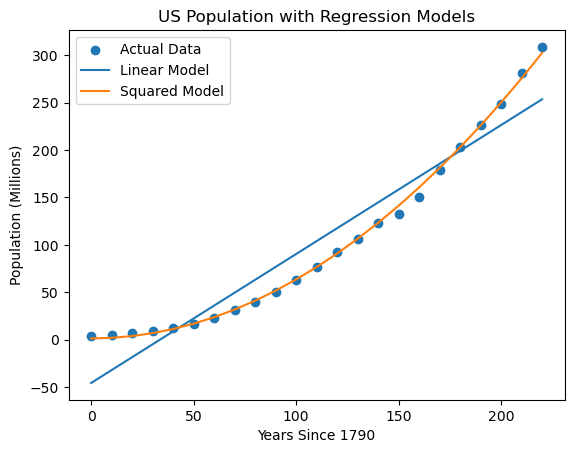

In [6]:
# ================================================================
# Title: Assignment 3.2 - US Population Growth
# Author: khannariya9 (GitHub username)
# Date: 12/21/2025
# Modified By: Cyndie Cramer
# Description: Analyze US population data from 1790 to 2010.
# Create new variables for years since 1790 and population 
# in millions, plots population growth over time, and builds
# two regression models:
# (1) a linear model using years since 1790 and
# (2) a quadratic-style model using the squared years since 1790.
# The models are compared visually and using R² values to 
# determine # which better fits long-term population growth.
# =================================================================


# Import the libraries we need
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset using the full file path
df = pd.read_csv(r"C:\Users\cyndi\Documents\week3data\us_pop_data.csv")

# (a) Create years since 1790 and population in millions
df["YearsSince1790"] = df["year"] - 1790
df["PopulationMillions"] = df["us_pop"] / 1_000_000

# (c) Linear regression using YearsSince1790
X = df[["YearsSince1790"]]
y = df["PopulationMillions"]

lin_model = LinearRegression()
lin_model.fit(X, y)

y_pred_linear = lin_model.predict(X)
r2_linear = r2_score(y, y_pred_linear)

print("Linear Model R²:", r2_linear)

# (d) Square the years since 1790
df["YearsSince1790_Squared"] = df["YearsSince1790"] ** 2

# (e) Linear regression using squared years
X_quad = df[["YearsSince1790_Squared"]]

quad_model = LinearRegression()
quad_model.fit(X_quad, y)

y_pred_quad = quad_model.predict(X_quad)
r2_quad = r2_score(y, y_pred_quad)

print("Squared Model R²:", r2_quad)

# # (b) Plot population vs years since 1790 and (f) Plot both models
plt.figure()
plt.scatter(df["YearsSince1790"], y, label="Actual Data")
plt.plot(df["YearsSince1790"], y_pred_linear, label="Linear Model")
plt.plot(df["YearsSince1790"], y_pred_quad, label="Squared Model")
plt.xlabel("Years Since 1790")
plt.ylabel("Population (Millions)")
plt.title("US Population with Regression Models")
plt.legend()
plt.show()
